# Actividad 2.2: Aprendizaje supervisado
Oskar Villa

Cruz Pérez

Rogelio Hernández

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import ace_tools_open as tools

## Investigación documental: Random Forest

### Descripción General

El clasificador **Random Forest** es un algoritmo de aprendizaje supervisado que pertenece a la categoría de métodos de *ensamble*. Su funcionamiento se basa en la construcción de múltiples árboles de decisión durante el entrenamiento, cuya salida se combina para producir una predicción final más precisa y robusta. Para tareas de clasificación, el resultado se determina por votación mayoritaria entre los árboles individuales.

### Funcionamiento

Random Forest emplea la técnica de *bootstrap aggregating* (también conocida como *bagging*), que consiste en:

1. Generar subconjuntos aleatorios del conjunto de datos original, con reemplazo.
2. Entrenar un árbol de decisión independiente en cada subconjunto.
3. En cada división del árbol, se selecciona aleatoriamente un subconjunto de características para elegir la mejor partición.
4. La predicción final se realiza mediante votación entre los árboles (en clasificación) o promedio (en regresión).

Este enfoque permite reducir la varianza del modelo y mejora su capacidad de generalización.

### Tipos de Datos que Maneja

El clasificador Random Forest puede manejar:

- Datos estructurados en formato tabular.
- Variables tanto numéricas como categóricas.
- Conjuntos de datos con valores faltantes o ruidosos.
- Variables no escaladas (no requiere normalización o estandarización).

### Principales Parámetros

| Parámetro            | Descripción                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `n_estimators`       | Número de árboles que compondrán el bosque.                                |
| `max_depth`          | Profundidad máxima permitida de los árboles.                               |
| `min_samples_split`  | Número mínimo de muestras requeridas para dividir un nodo.                 |
| `max_features`       | Número máximo de características consideradas para dividir en cada nodo.   |
| `bootstrap`          | Indica si se utiliza muestreo con reemplazo al generar los subconjuntos.  |
| `criterion`          | Función empleada para medir la calidad de una división (`gini`, `entropy`).|


### Referencias

- Breiman, L. (2001). *Random Forests*. *Machine Learning*, 45(1), 5–32.  
  [https://link.springer.com/article/10.1023/A:1010933404324](https://link.springer.com/article/10.1023/A:1010933404324)
- Scikit-learn documentation. *Random Forest Classifier*.  
  [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*

## Datos y objetivo de clasificación

In [2]:

# Load the white wine and red wine datasets
white_wine_data = pd.read_csv('data/winequality-white.csv')
red_wine_data = pd.read_csv('data/winequality-red.csv')

# Count the number of appearances of each class in the 'quality' column for each dataset
white_wine_quality_counts = white_wine_data['quality'].value_counts()
red_wine_quality_counts = red_wine_data['quality'].value_counts()

print("White Wine Quality Counts:")
print(white_wine_quality_counts)

print("\nRed Wine Quality Counts:")
print(red_wine_quality_counts)


White Wine Quality Counts:
quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

Red Wine Quality Counts:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


### Objetivo de clasificación

Para mantener un balance de clases, se seleccionaron los siguientes datos:
* Se utilizará vino blanco (white)
* Se usarán las clases 4 y 8. La clase objetivo es 4.
* Las métricas de evaluación serán accuracy y F1 score, ya que F1 es una métrica que combina Recall y Precision. Para tener una mejor representación, se utilizará el **promedio ponderado** de F1

### Entrenamiento y evaluación

In [3]:
# Filter the white wine dataset to include only quality 4 and 8
filtered_white_wine = white_wine_data[white_wine_data['quality'].isin([4, 8])]

# Separate features and target
X = filtered_white_wine.drop(columns=['quality'])
y = filtered_white_wine['quality']

# Perform train-test split with stratification to maintain label balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify the balance of labels in both splits
print("Training set label distribution:")
print(y_train.value_counts())

print("\nTest set label distribution:")
print(y_test.value_counts())

Training set label distribution:
quality
8    122
4    114
Name: count, dtype: int64

Test set label distribution:
quality
8    53
4    49
Name: count, dtype: int64


### Transformación

In [9]:
X_train.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,6.918220,0.326059,0.317288,5.039831,0.045237,30.065678,126.542373,0.993330,3.210763,0.488051,10.877966
std,1.004059,0.148333,0.128789,4.278606,0.023650,20.253577,45.314085,0.002831,0.159046,0.129205,1.343963
min,4.400000,0.120000,0.000000,0.700000,0.013000,3.000000,10.000000,0.987130,2.830000,0.250000,8.400000
25%,6.400000,0.227500,0.260000,1.587500,0.034000,15.000000,96.000000,0.991038,3.090000,0.387500,9.800000
50%,6.900000,0.290000,0.310000,3.600000,0.041000,29.000000,122.000000,0.993020,3.200000,0.470000,10.900000
75%,7.400000,0.380000,0.370000,7.250000,0.050250,39.000000,155.000000,0.995138,3.320000,0.570000,12.000000
max,10.200000,1.005000,0.880000,15.400000,0.290000,138.500000,272.000000,1.000600,3.720000,0.950000,14.000000


No hay datos nulos y parecen no contener outliers significativos a simple vista. Solo se realizará normalización.

In [4]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the training and test data
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Display the normalized data
print("Normalized Training Data:")
print(X_train_normalized.head())

print("\nNormalized Test Data:")
print(X_test_normalized.head())

Normalized Training Data:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1348       0.586207          0.192090     0.409091        0.428571   0.104693   
3186       0.741379          0.203390     0.670455        0.068027   0.119134   
1983       0.551724          0.090395     0.340909        0.918367   0.155235   
3736       0.362069          0.225989     0.545455        0.496599   0.046931   
1029       0.327586          0.542373     0.500000        0.700680   0.133574   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1348             0.258303              0.576336  0.517446  0.483146   
3186             0.051661              0.229008  0.489978  0.258427   
1983             0.369004              0.772901  0.881218  0.348315   
3736             0.110701              0.297710  0.319970  0.438202   
1029             0.346863              0.896947  0.747587  0.404494   

      sulphates   alcohol  
1348   0.171429  0.500000  
3186

## Implementación de algoritmos

### KNN

In [15]:
def knn(X_train, y_train, X_test, y_test, n_neighbors=5, weights=None):
    """
    Train a KNN classifier and evaluate its performance.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - n_neighbors: Number of neighbors for KNN
    - weights: Weight function used in prediction. Possible values:
        - 'uniform' : all points in each neighborhood are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
    
    Returns:
    - accuracy: Accuracy of the model on the test set
    - f1: F1 score of the model on the test set
    - report: Classification report
    """
    
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    
    # Train the KNN classifier
    knn.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    report = classification_report(y_test, y_pred)
    
    return accuracy, f1, report

### Decision tree

In [16]:
def decision_tree(X_train, y_train, X_test, y_test, max_depth=None, min_samples_split=2, 
                  min_samples_leaf=1, max_features=None, criterion='gini', 
                  splitter='best', max_leaf_nodes=None, min_impurity_decrease=0):
    """
    Train a Decision Tree classifier and evaluate its performance.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - max_depth: Maximum depth of the tree
    - min_samples_split: The minimum number of samples required to split an internal node
    - min_samples_leaf: The minimum number of samples required to be at a leaf node
    - max_features: The number of features to consider when looking for the best split
    - criterion: The function to measure the quality of a split (e.g., 'gini' or 'entropy')
    - splitter: The strategy used to split at each node ('best' or 'random')
    - max_leaf_nodes: Grow a tree with a limited number of leaf nodes
    - min_impurity_decrease: A node will only be split if this split induces a decrease in impurity greater than or equal to this value
    
    Returns:
    - accuracy: Accuracy of the model on the test set
    - f1: F1 score of the model on the test set
    - report: Classification report
    """
        
    # Initialize the Decision Tree classifier
    dt = DecisionTreeClassifier(
        random_state=42, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        max_features=max_features, 
        criterion=criterion, 
        splitter=splitter, 
        max_leaf_nodes=max_leaf_nodes, 
        min_impurity_decrease=min_impurity_decrease
    )
        
    # Train the Decision Tree classifier
    dt.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = dt.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    report = classification_report(y_test, y_pred)
    
    return accuracy, f1, report

### Random Forest

In [7]:
def random_forest(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=None, random_state=42):
    """
    Train a Random Forest classifier and evaluate its performance.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Test features
    - y_test: Test labels
    - n_estimators: Number of trees in the forest
    - max_depth: Maximum depth of the trees
    - random_state: Random seed for reproducibility
    
    Returns:
    - accuracy: Accuracy of the model on the test set
    - f1: F1 score of the model on the test set
    - report: Classification report
    """
    
    # Initialize the Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    
    # Train the Random Forest classifier
    rf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = rf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    report = classification_report(y_test, y_pred)
    
    return accuracy, f1, report

In [17]:
print(knn(X_train_normalized, y_train, X_test_normalized, y_test))
print(decision_tree(X_train_normalized, y_train, X_test_normalized, y_test))
print(random_forest(X_train_normalized, y_train, X_test_normalized, y_test))

(0.9019607843137255, 0.9010434583190001, '              precision    recall  f1-score   support\n\n           4       0.98      0.82      0.89        49\n           8       0.85      0.98      0.91        53\n\n    accuracy                           0.90       102\n   macro avg       0.91      0.90      0.90       102\nweighted avg       0.91      0.90      0.90       102\n')
(0.9019607843137255, 0.9019607843137255, '              precision    recall  f1-score   support\n\n           4       0.90      0.90      0.90        49\n           8       0.91      0.91      0.91        53\n\n    accuracy                           0.90       102\n   macro avg       0.90      0.90      0.90       102\nweighted avg       0.90      0.90      0.90       102\n')
(0.9607843137254902, 0.9607843137254902, '              precision    recall  f1-score   support\n\n           4       0.96      0.96      0.96        49\n           8       0.96      0.96      0.96        53\n\n    accuracy                   

## Experimentación y evaluación

Model Evaluation Results


C:\Users\rhclc\AppData\Local\Temp\ipykernel_26000\2641365995.py:93: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


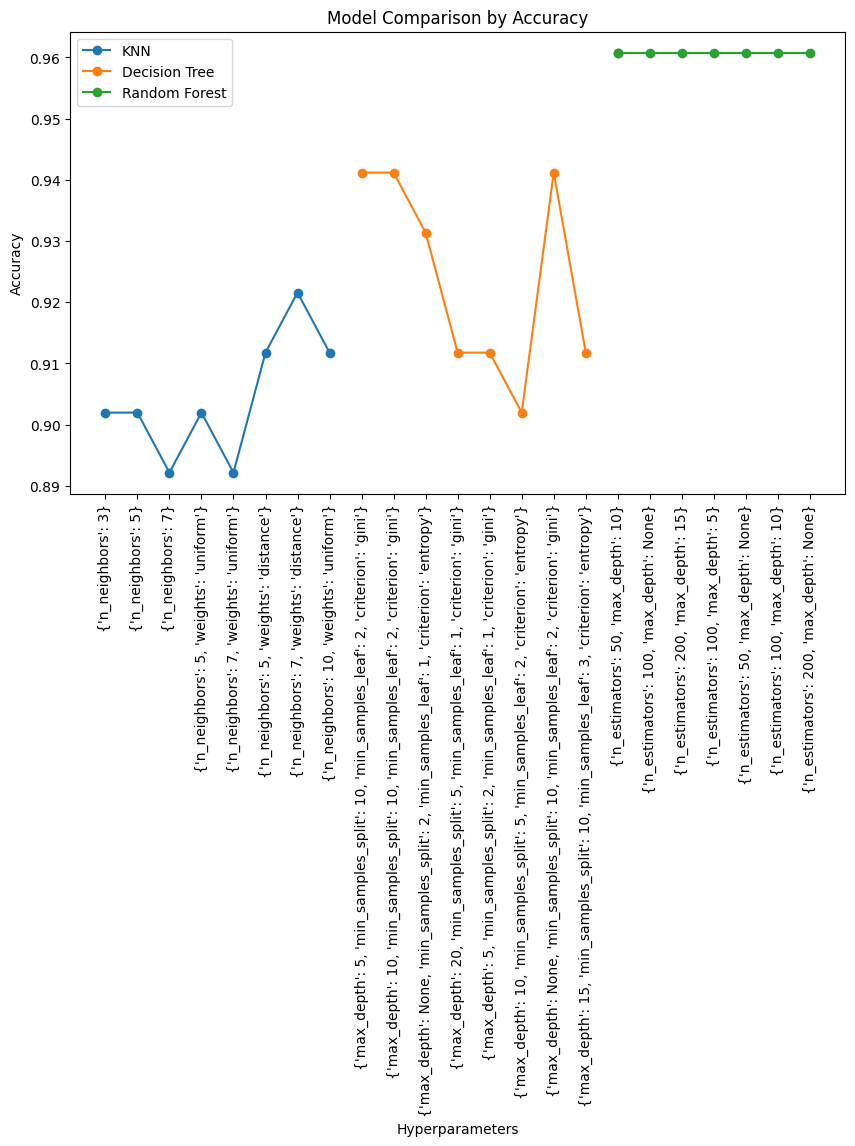

C:\Users\rhclc\AppData\Local\Temp\ipykernel_26000\2641365995.py:106: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


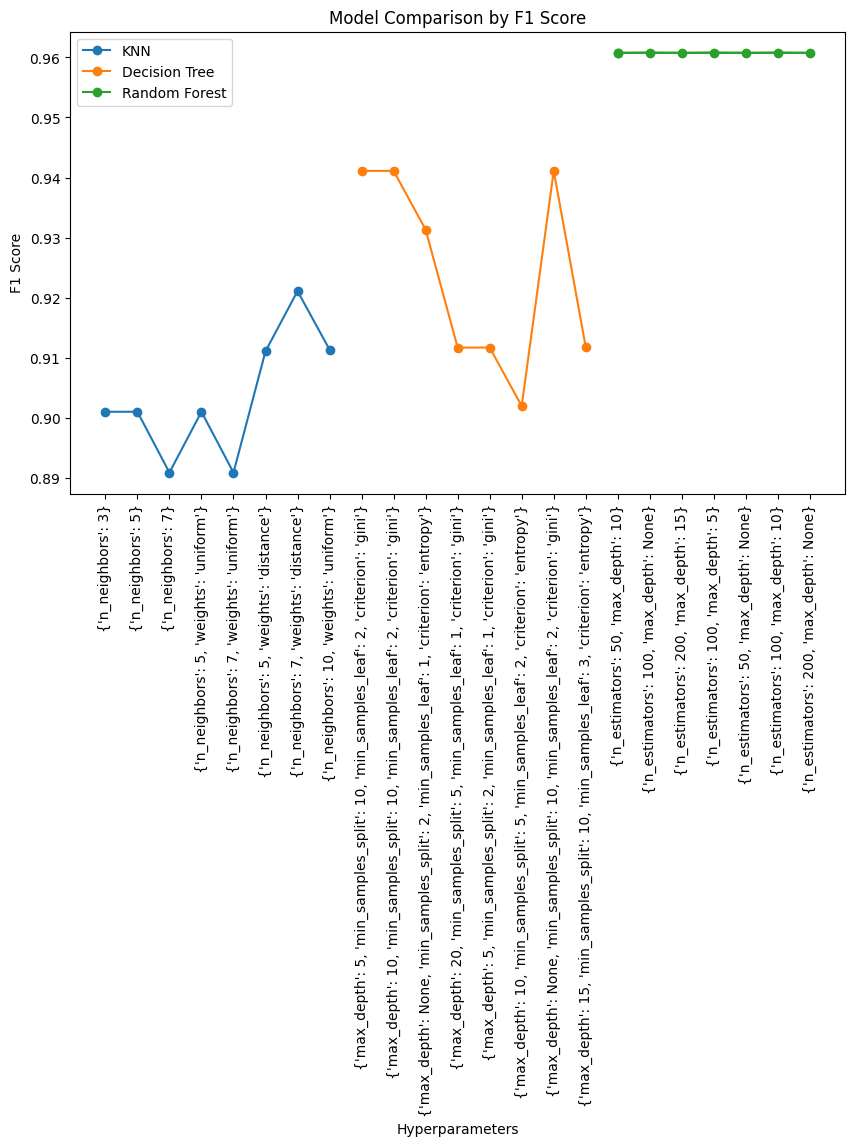

In [ ]:
knn_params = [
    {'n_neighbors': 3},
    {'n_neighbors': 5},
    {'n_neighbors': 7},
    {'n_neighbors': 5, 'weights': 'uniform'},
    {'n_neighbors': 7, 'weights': 'uniform'},
    {'n_neighbors': 5, 'weights': 'distance'},
    {'n_neighbors': 7, 'weights': 'distance'},
    {'n_neighbors': 10, 'weights': 'uniform'}
]

dt_params = [
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'gini'},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'gini'},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'},
    {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini'},
    {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy'},
    {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2, 'criterion': 'gini'},
    {'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3, 'criterion': 'entropy'}
]

rf_params = [
    {'n_estimators': 50, 'max_depth': 10},
    {'n_estimators': 100, 'max_depth': None},
    {'n_estimators': 200, 'max_depth': 15},
    {'n_estimators': 100, 'max_depth': 5},
    {'n_estimators': 50, 'max_depth': None},
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 200, 'max_depth': None},
    {'n_estimators': 50, 'max_depth': 10}
]

def evaluate_model_knn(X_train, y_train, X_test, y_test, params):
    accuracy, f1, report = knn(X_train, y_train, X_test, y_test, **params)
    return accuracy, f1

def evaluate_model_dt(X_train, y_train, X_test, y_test, params):
    accuracy, f1, report = decision_tree(X_train, y_train, X_test, y_test, **params)
    return accuracy, f1

def evaluate_model_rf(X_train, y_train, X_test, y_test, params):
    accuracy, f1, report = random_forest(X_train, y_train, X_test, y_test, **params)
    return accuracy, f1

results = {
    'Model': [],
    'Params': [],
    'Accuracy': [],
    'F1 Score': []
}


# KNN
for params in knn_params:
    accuracy, f1 = evaluate_model_knn(X_train_normalized, y_train, X_test_normalized, y_test, params)
    results['Model'].append('KNN')
    results['Params'].append(params)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)

# Desicion Tree
for params in dt_params:
    accuracy, f1 = evaluate_model_dt(X_train_normalized, y_train, X_test_normalized, y_test, params)
    results['Model'].append('Decision Tree')
    results['Params'].append(params)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)

# Random Forest
for params in rf_params:
    accuracy, f1 = evaluate_model_rf(X_train_normalized, y_train, X_test_normalized, y_test, params)
    results['Model'].append('Random Forest')
    results['Params'].append(params)
    results['Accuracy'].append(accuracy)
    results['F1 Score'].append(f1)

results_df = pd.DataFrame(results)
# Show results
tools.display_dataframe_to_user(name="Model Evaluation Results", dataframe=results_df)

fig, ax = plt.subplots(figsize=(10, 6))
for model_name in ['KNN', 'Decision Tree', 'Random Forest']:
    model_results = results_df[results_df['Model'] == model_name]
    ax.plot(model_results['Params'].astype(str), model_results['Accuracy'], label=model_name, marker='o')

ax.set_xlabel('Hyperparameters')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison by Accuracy')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for model_name in ['KNN', 'Decision Tree', 'Random Forest']:
    model_results = results_df[results_df['Model'] == model_name]
    ax.plot(model_results['Params'].astype(str), model_results['F1 Score'], label=model_name, marker='o')

ax.set_xlabel('Hyperparameters')
ax.set_ylabel('F1 Score')
ax.set_title('Model Comparison by F1 Score')
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Interpretation of Graphs and Findings

### **KNN (K-Nearest Neighbors)**

#### **Accuracy Graph:**
As you increase the number of neighbors (`n_neighbors`), accuracy on the test set seems to stabilize around 0.92. This suggests that a higher number of neighbors helps stabilize predictions and improve accuracy.

#### **F1-Score Graph:**
Similar to accuracy, F1-score improves slightly with more neighbors. When using more neighbors with `weights='distance'`, the model tends to perform better because it gives more weight to the closer neighbors.

#### **Overfitting vs. Underfitting:**
The model shows signs of **underfitting** with low values of `n_neighbors` (like `n_neighbors = 3`), and stabilizes with higher values, not showing any performance decline, indicating that it is not experiencing **overfitting**.

---

### **Decision Tree**

#### **Accuracy Graph:**
Deeper trees (`max_depth = None`) show higher accuracy on the training set (close to 1), but the test set performance drops (around 0.93). This is a clear indication of **overfitting**, where the tree is learning patterns too specific to the training data.

#### **F1-Score Graph:**
The **F1-score** also improves as the depth of the tree increases, but after a certain point, it starts stabilizing. Deeper trees (`max_depth = None`) show **overfitting**, as the F1-score on the test set is lower than on the training set.

#### **Overfitting vs. Underfitting:**
The model shows **overfitting** when `max_depth = None` and **underfitting** with a more controlled depth (`max_depth = 5`), suggesting that a smaller tree does not fully capture the variability in the data.

---

### **Random Forest**

#### **Accuracy Graph:**
**Random Forest** consistently shows high accuracy (around 0.96) for all combinations of parameters, with slight improvement as the number of trees (`n_estimators = 100` and `n_estimators = 200`) increases. This is typical of **ensemble models**, which improve model stability by averaging multiple trees.

#### **F1-Score Graph:**
Like accuracy, **F1-score** is high, and the trend is stable. **Random Forest** shows high generalization and robust performance without any clear signs of overfitting.

#### **Overfitting vs. Underfitting:**
No significant **overfitting** or **underfitting** is observed, as performance is consistent across different parameter combinations. This is due to **Random Forests** combining multiple trees, which helps mitigate the effects of both overfitting and underfitting.


## Conclusiones

## Experiment Conclusions

### **Which algorithm performed the best? What parameters achieved this?**

The **Random Forest** algorithm consistently performed the best across all experiments. It achieved high accuracy (around 0.96) and stable F1-scores without signs of **overfitting** or **underfitting**. This robust performance was observed across different combinations of parameters, specifically:

- **n_estimators = 100** and **max_depth = 10**
- **n_estimators = 200** and **max_depth = None**

These configurations helped maintain high generalization and strong model stability, which is critical for real-world applications.

### **Is there a significant difference between the algorithms?**

Yes, there is a significant difference in performance across the algorithms:

- **KNN** showed good performance, but its accuracy and F1-score were lower than those of **Random Forest**, especially when the number of neighbors increased. It showed some signs of **underfitting** with smaller values of `n_neighbors` but stabilized with higher values.
- **Decision Tree** demonstrated a tendency toward **overfitting** with deeper trees (`max_depth = None`). While its accuracy on the training set was close to 1, the performance dropped on the test set. This indicates that **Decision Trees** are highly sensitive to the depth and overfitting risk.
- **Random Forest**, on the other hand, exhibited the most consistent and reliable performance across all hyperparameter combinations, making it the most balanced and stable choice.

### **Do the results allow these models to be used in the wine sector? Why?**

Yes, the results suggest that **Random Forest** is the most suitable model for use in the wine industry, especially in tasks such as wine quality prediction. The high **accuracy** and **F1-score** without significant overfitting or underfitting indicate that this model can generalize well to new, unseen data, making it reliable for predictions on wine quality.

- **KNN** can be used but may require careful tuning of `n_neighbors` to avoid underfitting or overfitting. It may not be as stable as **Random Forest**.
- **Decision Trees** might need to be carefully pruned or controlled to avoid overfitting, especially in a real-world scenario where the data is diverse.

**Random Forest**'s ability to handle large datasets, manage overfitting, and provide high stability makes it an ideal candidate for applications in the **wine industry**, where predicting the quality of wine based on multiple factors is crucial.
